# Reading in Some Data

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

In [35]:
df = pd.read_csv("/content/drive/MyDrive/scikit-learn tutorial/data/drawndata1.csv")

In [36]:
df.head(3)

,x,y,z
0,58.080365,225.699042,a
1,238.867357,247.456645,a
2,156.218212,286.588782,a


In [37]:
X = df[['x', 'y']].values
y = df['z'] == "a"

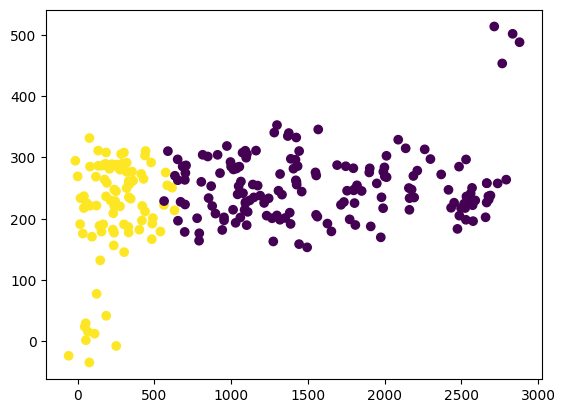

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y);

Just applying a scaler here.

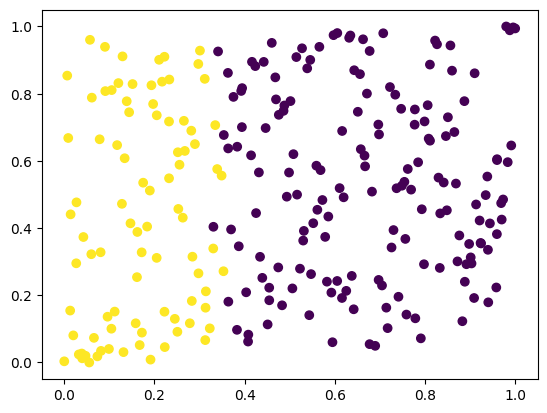

In [ ]:
from sklearn.preprocessing import StandardScaler, QuantileTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

X_new = QuantileTransformer(n_quantiles=100).fit_transform(X)
plt.scatter(X_new[:, 0], X_new[:, 1], c=y);

Function to deal with the plotting.

In [ ]:
def plot_output(scaler):
    pipe = Pipeline([
        ("scale", scaler),
        ("model", KNeighborsClassifier(n_neighbors=20, weights='distance'))
    ])

    pred = pipe.fit(X, y).predict(X)

    plt.figure(figsize=(9, 3))
    plt.subplot(131)
    plt.scatter(X[:, 0], X[:, 1], c=y)
    plt.title("Original Data")
    plt.subplot(132)
    X_tfm = scaler.transform(X)
    plt.scatter(X_tfm[:, 0], X_tfm[:, 1], c=y)
    plt.title("Transformed Data")
    plt.subplot(133)
    X_new = np.concatenate([
        np.random.uniform(0, X[:, 0].max(), (5000, 1)),
        np.random.uniform(0, X[:, 1].max(), (5000, 1))
    ], axis=1)
    # 部分函数可以定义 predict_proba 以发挥概率而不是结果
    y_proba = pipe.predict_proba(X_new)
    plt.scatter(X_new[:, 0], X_new[:, 1], c=y_proba[:, 1], alpha=0.7)
    plt.title("Predicted Data")

Effect of StandardScaler

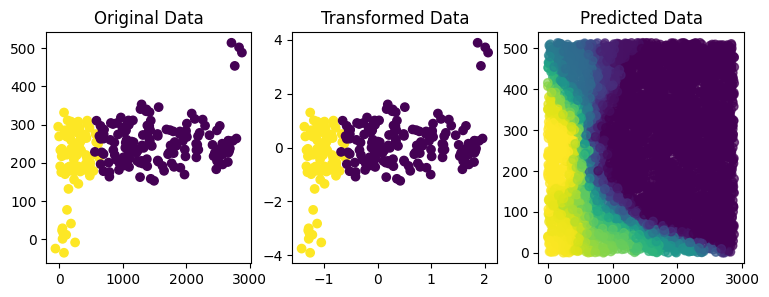

In [ ]:
plot_output(scaler=StandardScaler())

Effect of QuantileTransformer

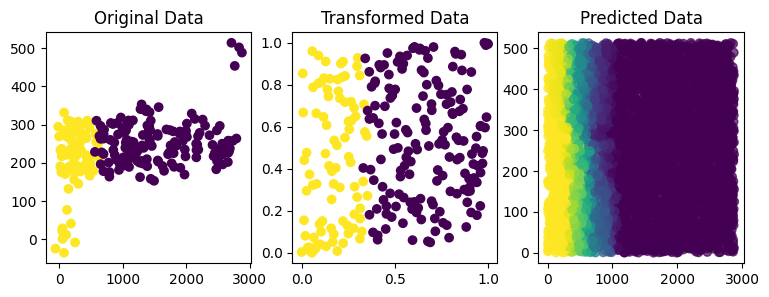

In [ ]:
plot_output(scaler=QuantileTransformer(n_quantiles=100))

# New Dataset

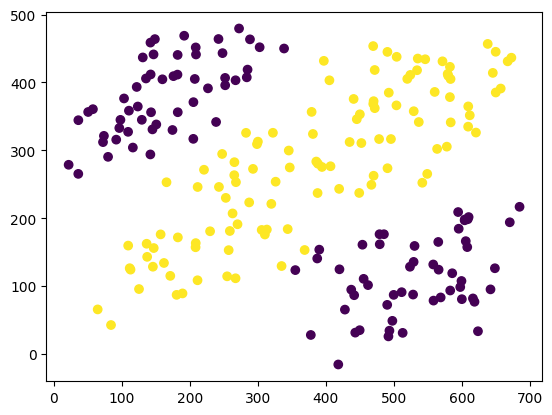

In [39]:
df = pd.read_csv("/content/drive/MyDrive/scikit-learn tutorial/data/drawndata2.csv")
X = df[['x', 'y']].values
y = df['z'] == 'a'
plt.scatter(X[:, 0], X[:, 1], c=y);

1.0


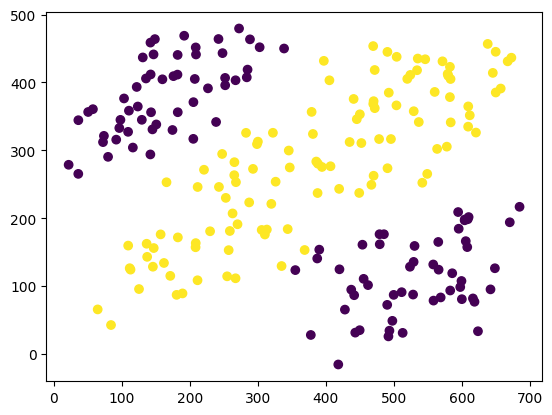

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    # 使得模型能捕捉非线性关系，是的 logistic 函数中带有项：1, x1, x2, x1*x2, x1^2, x2^2
    ("scale", PolynomialFeatures()),
    ("model", LogisticRegression())
])

model = pipe.fit(X, y)
pred = model.predict(X)
# score 函数接受 x 作为输入，自动计算预测值并和真实值进行比较
print(model.score(X, y))
plt.scatter(X[:, 0], X[:, 1], c=pred);

# One Hot Encoding

当文字数据之间没有明显的排序关系时可以使用独热编码以保持客观性并将所有类别进行编码

In [ ]:
arr = np.array(["low", "low", "high", "medium"]).reshape(-1, 1)
arr

array([['low'],
       ['low'],
       ['high'],
       ['medium']], dtype='<U6')

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
# 如果不配置 handle_unknown，遇上未学习过的数据会直接报错
enc = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
new_data = enc.fit_transform(arr)
# 查看独热编码的顺序和学习到的类别
print(enc.categories_)
print(new_data)
# 查看新获得的列名 -> 创建新 dataframe
print(enc.get_feature_names_out())

[array(['high', 'low', 'medium'], dtype='<U6')]
[[0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]]
['x0_high' 'x0_low' 'x0_medium']


In [ ]:
import pandas as pd
pd.DataFrame(new_data, columns=enc.get_feature_names_out())

,x0_high,x0_low,x0_medium
0,0.0,1.0,0.0
1,0.0,1.0,0.0
2,1.0,0.0,0.0
3,0.0,0.0,1.0


In [ ]:
# 遇到训练中没见过的数据则将三个类别都设置为 0
enc.transform([["zero"]])

array([[0., 0., 0.]])

### Ordinal Encoding

当文字型数据具有明确的排位关系时，使用 ordinal encoder 以保留这种排位关系

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
import numpy as np

# 先定义好先后顺序，避免自动编码混乱
encoder = OrdinalEncoder(categories=[["low", "medium", "high"]])
data = np.array([["low", "low", "high", "medium"]]).reshape(-1, 1)
print(encoder.fit_transform(data))
# 查看处理过的分类
encoder.categories

[[0.]
 [0.]
 [2.]
 [1.]]


[['low', 'medium', 'high']]

In [ ]:
# 一次性处理多个类别
encoder = OrdinalEncoder(categories=[
    ["low", "medium", "high"],
    ["tiny", "small", "big"]
])

data = np.array([["low", "low", "high", "medium"], ["tiny", "small", "big", "big"]]).T

print(encoder.fit_transform(data))
encoder.categories_

[[0. 0.]
 [0. 1.]
 [2. 2.]
 [1. 2.]]


[array(['low', 'medium', 'high'], dtype=object),
 array(['tiny', 'small', 'big'], dtype=object)]